In [1]:
# Se requiere Python ≥ 3.5
import sys;
assert sys.version_info >= (3, 5);
import pandas as pd
import matplotlib as mpl;
import matplotlib.pyplot as plt;
import seaborn as sns
sns.set_theme(context='notebook', style='ticks', palette='colorblind', font='sans', font_scale=1.2, color_codes=True,rc={'figure.figsize':(15,8.27)})
# tamaño del texto en las etiquetas por defecto
mpl.rc('axes',  labelsize=14);
mpl.rc('xtick', labelsize=12);
mpl.rc('ytick', labelsize=12);

/tmp/ipykernel_1781/1152828879.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [1]:

def load_pokemon_data():
    csv_path = "pokemon.csv";
    return pd.read_csv(csv_path);

# Descripción de los datos

In [7]:
pokemon = load_pokemon_data();
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


En este dataset tenemos los datos de los 721 primeros Pokémon, con sus diferentes formas alternativas.

In [13]:
pokemon.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

Aquí podemos ver las diferentes columnas:  
Tenemos su número de la pokédex (#), los cuales son de tipo int y pueden estar repetidos debido a que las formas normales y alternativas comparten número.  
Luego tenemos los nombres de los pokémon, de tipo object.  
Seguidamente tenemos Type 1 y Type 2, también de tipo object, los cuales son los tipos de los pokémon. Aquí se da una cosa interesante y es que tenemos 386 valores nulos en Type 2 (el único campo con valores nulos). Esto se debe a que no todos los pokémon tienen un tipo secundario.  
Total es la suma total de las estadísticas base de los pokémon, que son los siguientes campos (Hp, Attack, Defense, Sp. Atk, Sp. Def y Speed). Todos ellos son del tipo int.
Generation, de tipo int, representa la generación a la que pertenece cada pokémon.
Finalmente Legendary es un boolean que nos dice si el pokémon es legendario o no.

# Análisis y limpieza de datos

In [14]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Lo primero que observamos es que no hay valores nulos, salvos en Type 2, que tenemos 386 nulos. Esto se debe a que no todos los pokémon tienen un tipo secundario, así que no es algo que debamos corregir.

In [21]:
pokemon['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

Aquí vemos los 18 tipos que existen. Vamos a ver ahora cuantos pokémon tienen cada uno de los tipo como primario:

In [33]:
pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

Podemos ver que el tipo con más pokémon es el agua seguido del normal. Vamos a verlo en un gráfico

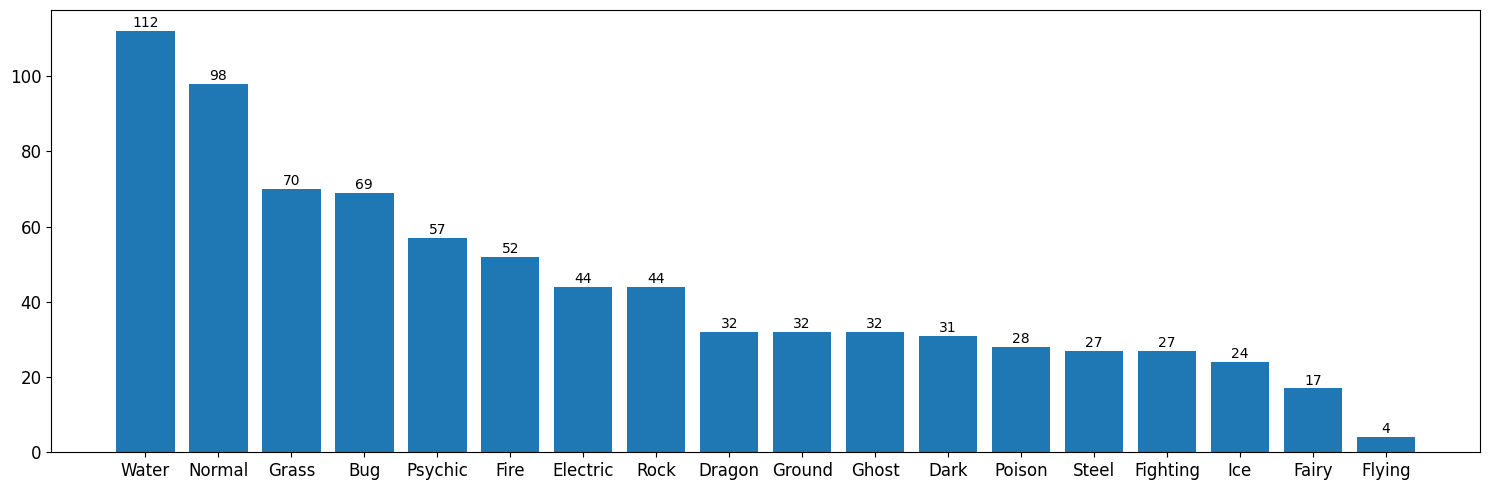

In [40]:
#Now that the questions asked before have been answered, Let's proceed to plot the data using Matplotlib

type_1_number = pokemon['Type 1'].value_counts()
fig,ax = plt.subplots(figsize=(15,5))
ax.bar(type_1_number.index,type_1_number.values) # Nice way to avoid creating a variable by using .index and .values.
# This for loop is to place the value on top of the bar
for i in range(type_1_number.shape[0]):
  ax.text(i, type_1_number.values[i]+1, type_1_number.values[i], horizontalalignment='center')
plt.tight_layout()

Veamos que pasa con el tipo secundario:

In [41]:
pokemon['Type 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

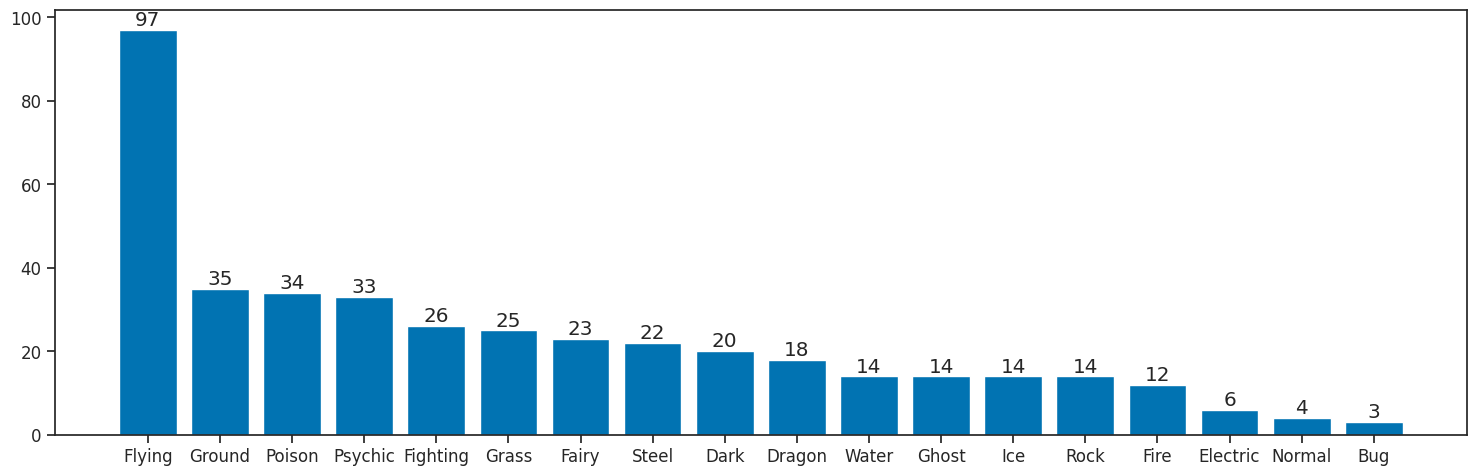

In [89]:
#Now that the questions asked before have been answered, Let's proceed to plot the data using Matplotlib

type_2_number = pokemon['Type 2'].value_counts()
fig,ax = plt.subplots(figsize=(15,5))
ax.bar(type_2_number.index,type_2_number.values) # Nice way to avoid creating a variable by using .index and .values.
# This for loop is to place the value on top of the bar
for i in range(type_2_number.shape[0]):
  ax.text(i, type_2_number.values[i]+1, type_2_number.values[i], horizontalalignment='center')
plt.tight_layout()

Como podemos ver, el tipo secundario más repetido es el volador con mucha diferencia. Ahora otra cosa interesante para ver son las combinaciones de tipos.

In [43]:
pokemon['Type 1-2'] = pokemon['Type 1'] + " - " + pokemon['Type 2']
pokemon['Type 1-2'].value_counts()

Normal - Flying    24
Grass - Poison     15
Bug - Flying       14
Bug - Poison       12
Ghost - Grass      10
                   ..
Bug - Water         1
Grass - Dragon      1
Psychic - Grass     1
Water - Steel       1
Fire - Water        1
Name: Type 1-2, Length: 136, dtype: int64

Vemos que hay 136 combinaciones distintas de tipos y que la más repetida es Normal - Flying. Vamos a ver el resto de combinaciones más comunes:

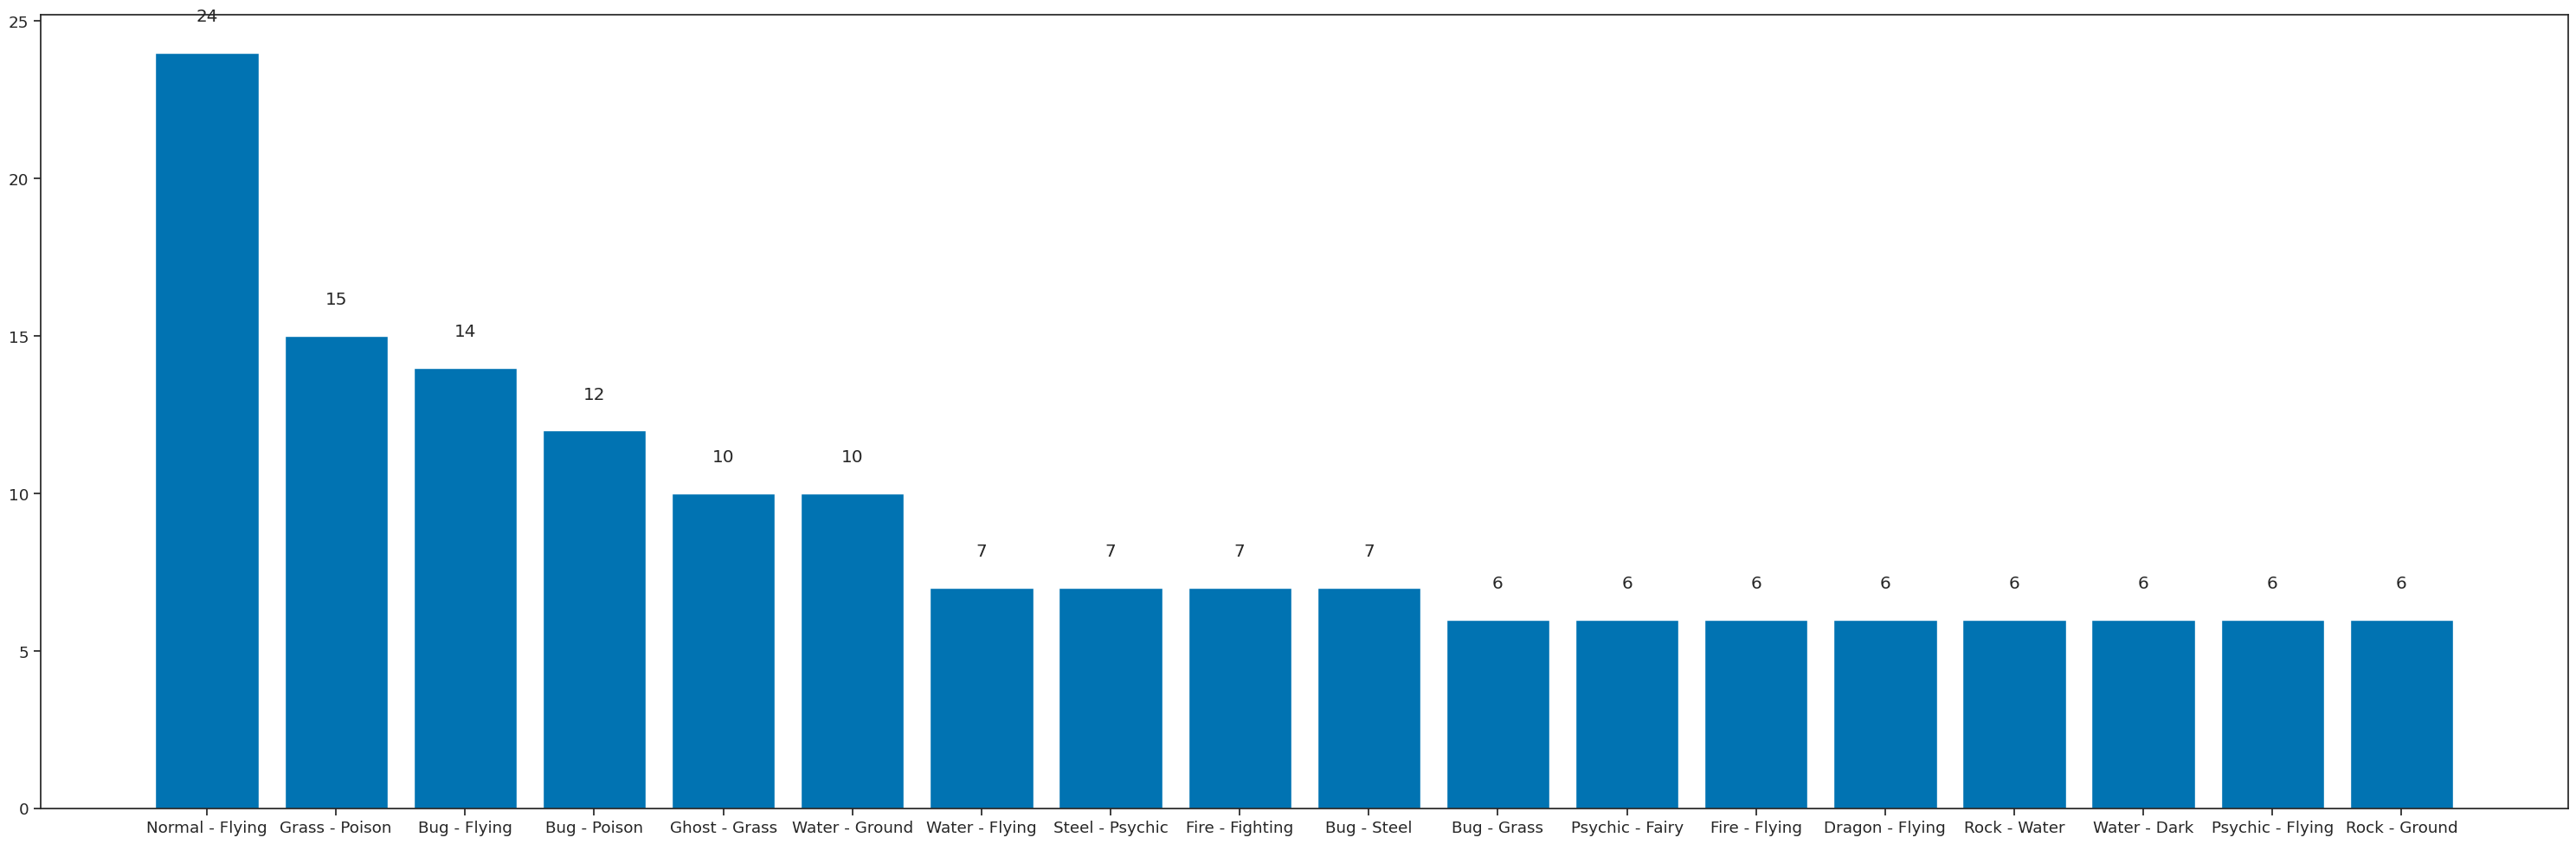

In [86]:
type_4_number = pokemon['Type 1-2'].value_counts()[0:18]
fig,ax = plt.subplots(figsize=(30,10))
ax.bar(type_4_number.index,type_4_number.values)
for i in range(type_4_number.shape[0]):
  ax.text(i, type_4_number.values[i]+1, type_4_number.values[i], horizontalalignment='center')
plt.tight_layout()

Algo que se puede dar por hecho es que los pokémon legendarios son menos comunes pero mucho más fuertes que los no legendarios. Vamos a comprobarlo:

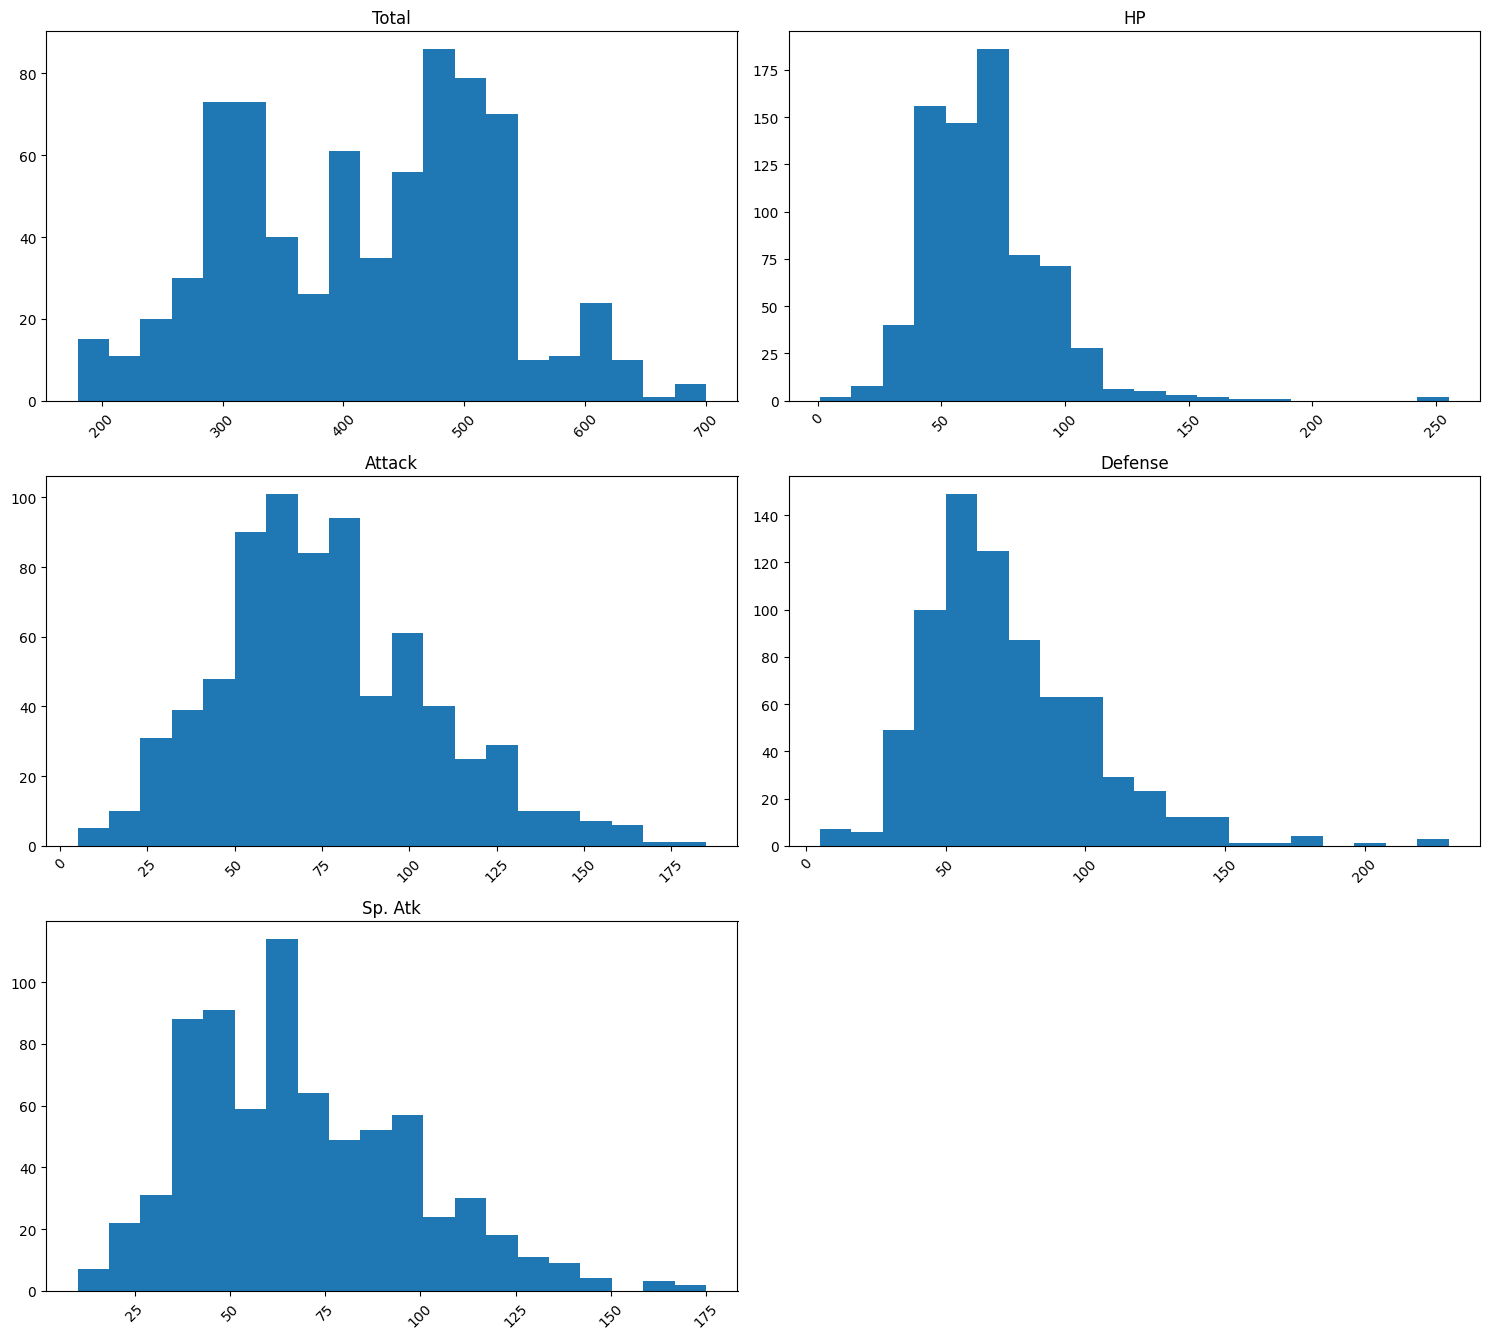

In [61]:
non_legendary = pokemon[pokemon['Legendary']==False]
fig = non_legendary.iloc[:,1:9].hist(bins=20, linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(10,9), grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))

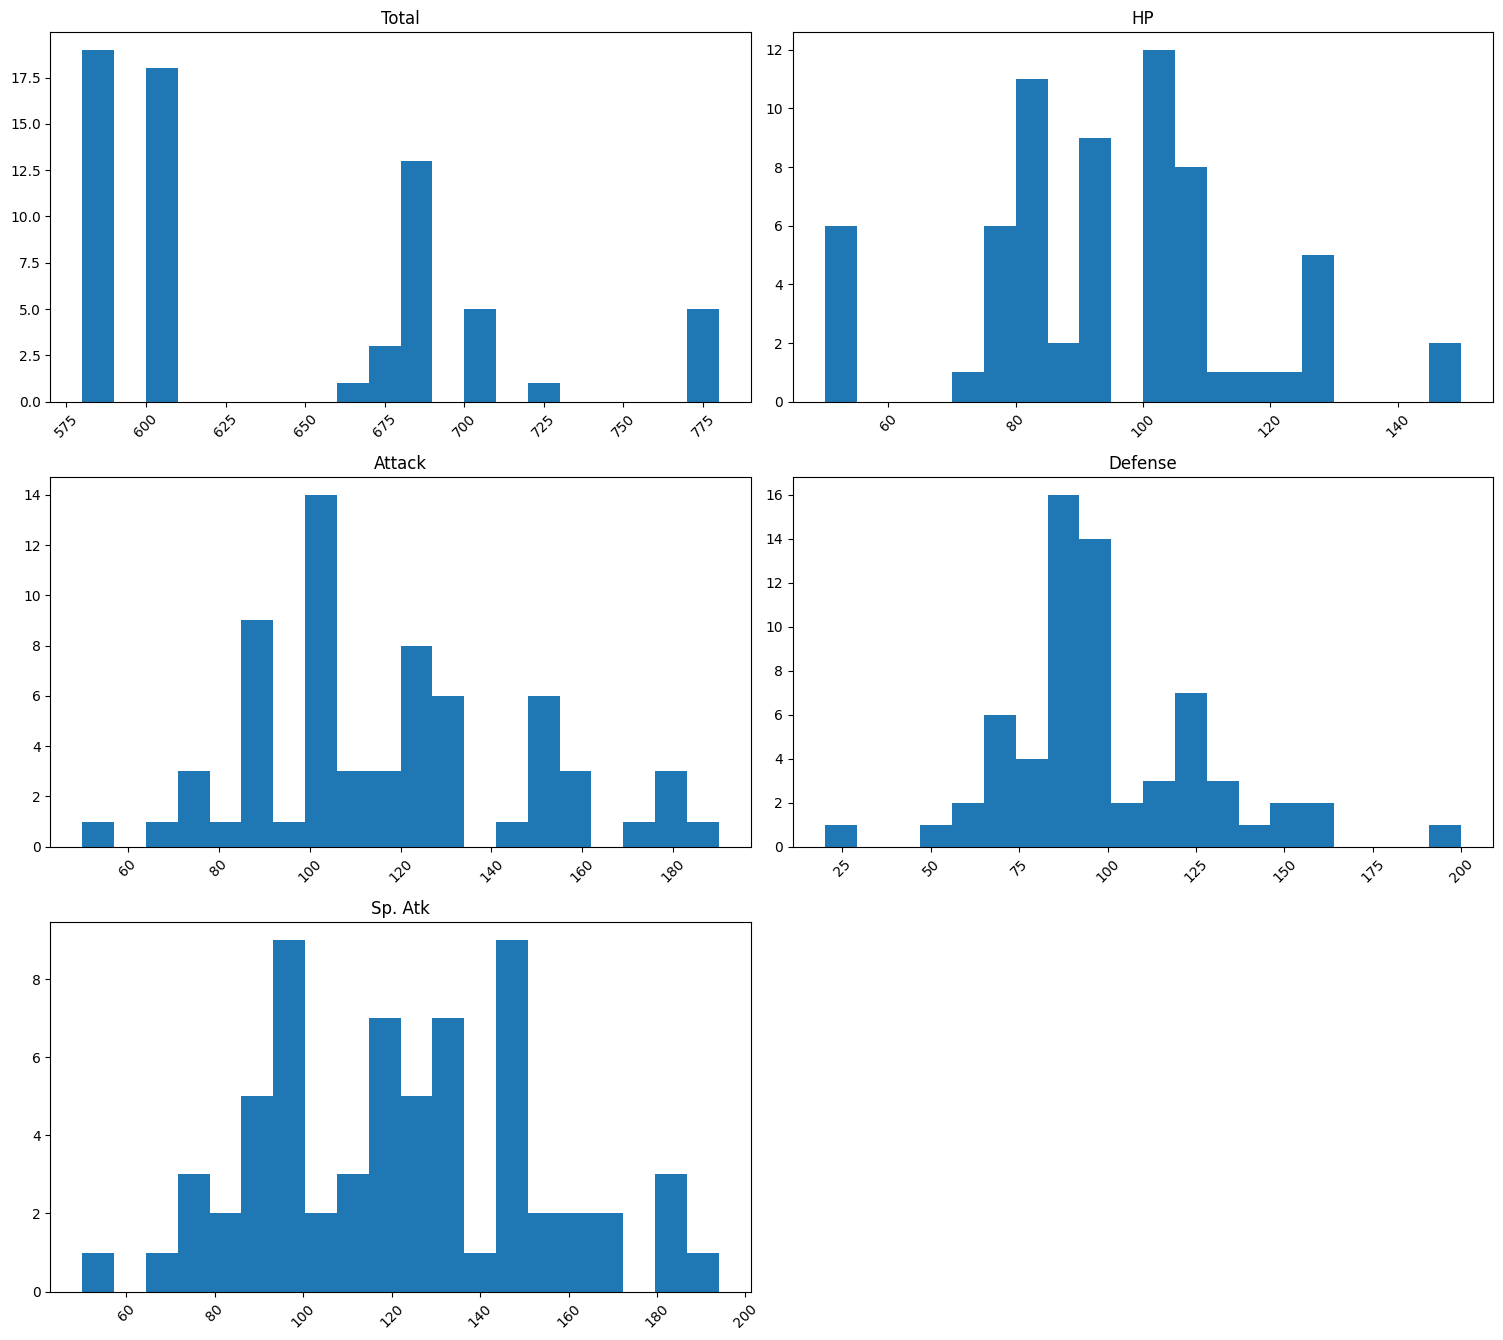

In [62]:
legendary = pokemon[pokemon['Legendary']==True]
fig = legendary.iloc[:,1:9].hist(bins=20, linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(10,9), grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))

Como podemos ver, la suposición que hicimos fue la correcta. Pero vamos a ver una comparación aún más directa:

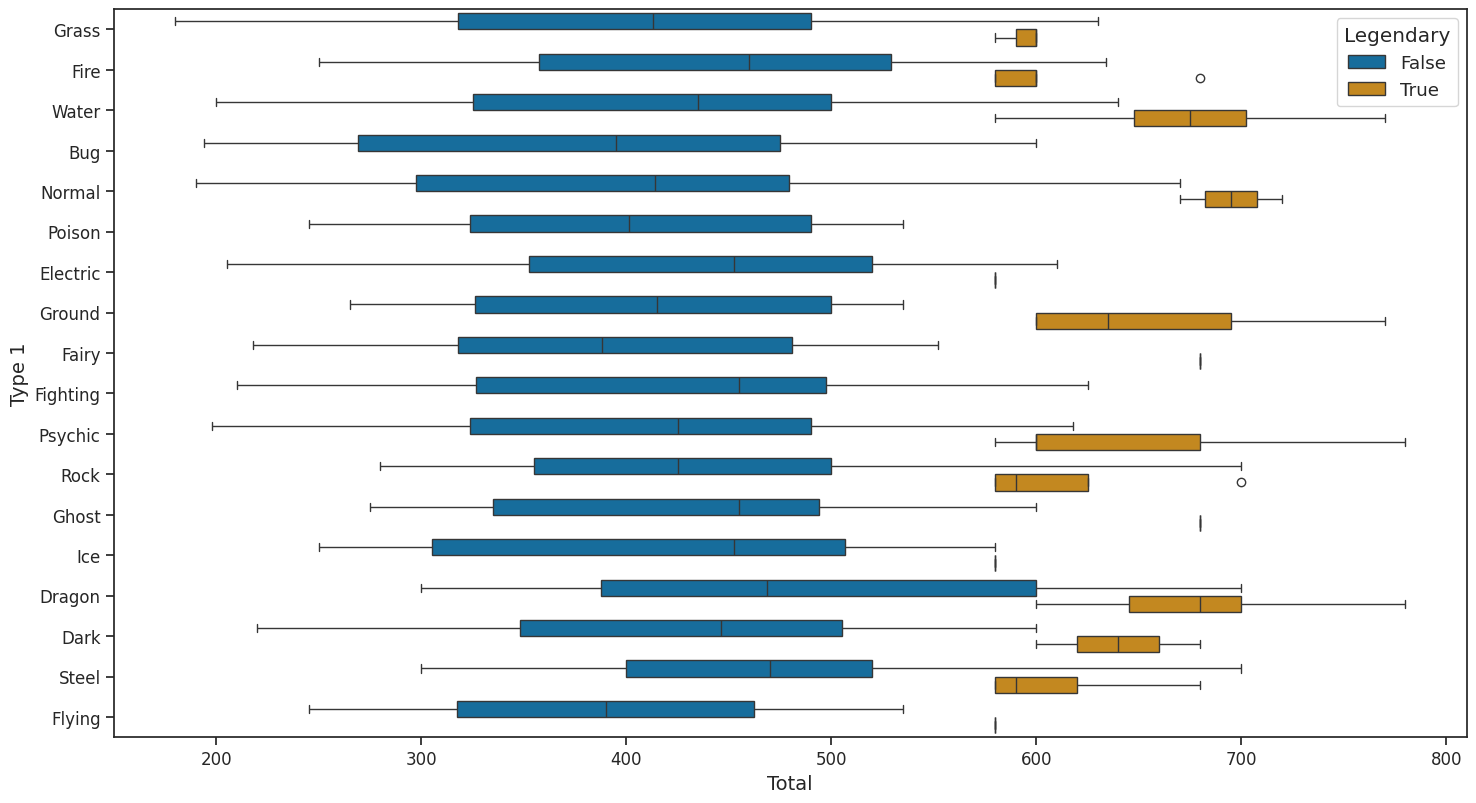

In [95]:
fig = plt.figure()
ax = sns.boxplot(y="Type 1", x="Total",hue='Legendary',
            data=pokemon)


plt.tight_layout()

Ahora vamos a ver que tipo tiene los mejores stats:

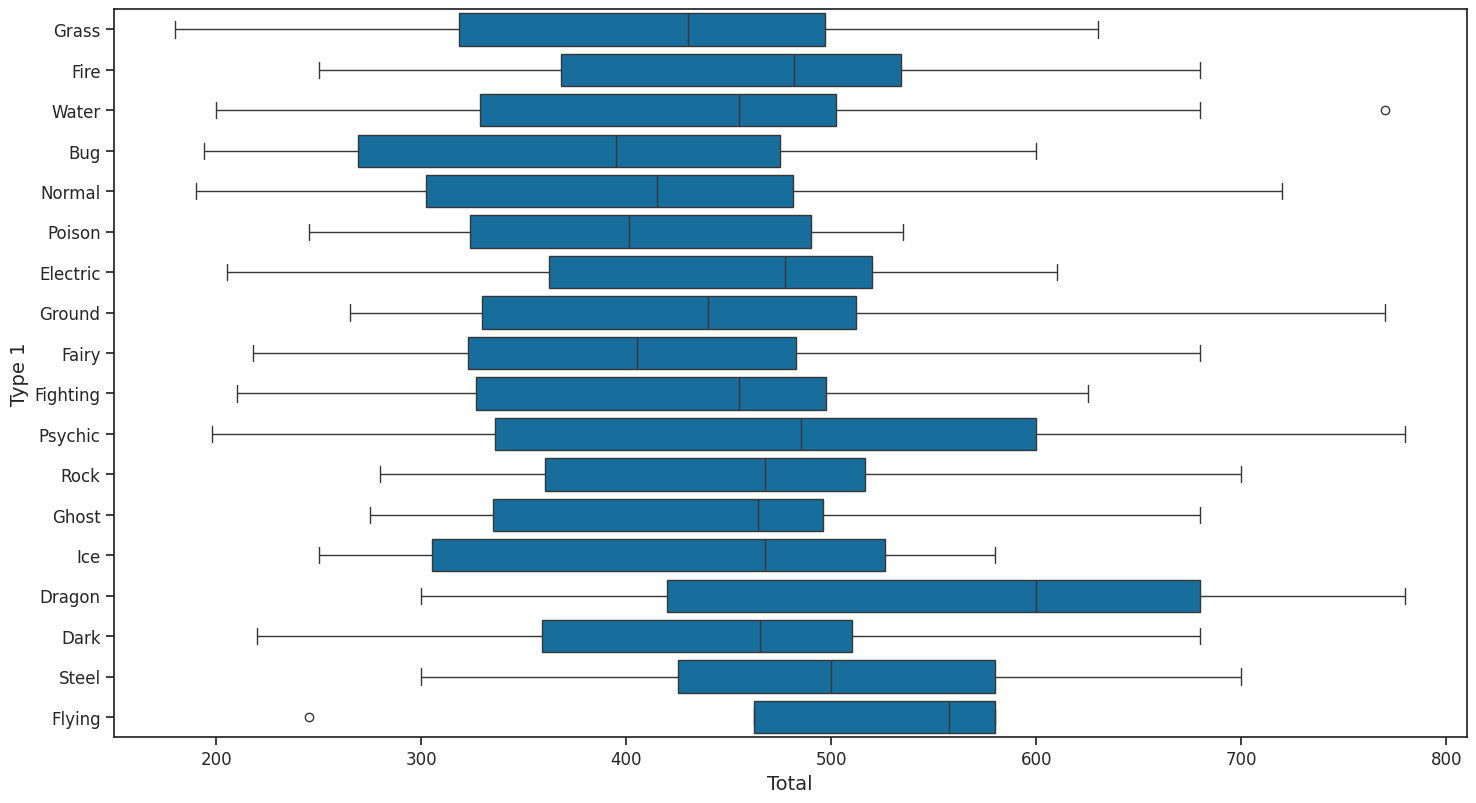

In [97]:
fig = plt.figure()
ax = sns.boxplot(y="Type 1", x="Total", data=pokemon)
plt.tight_layout()

Como vemos el tipo con mejores stats en total es el Dragon. Vamos a ver cada stat de forma individual:

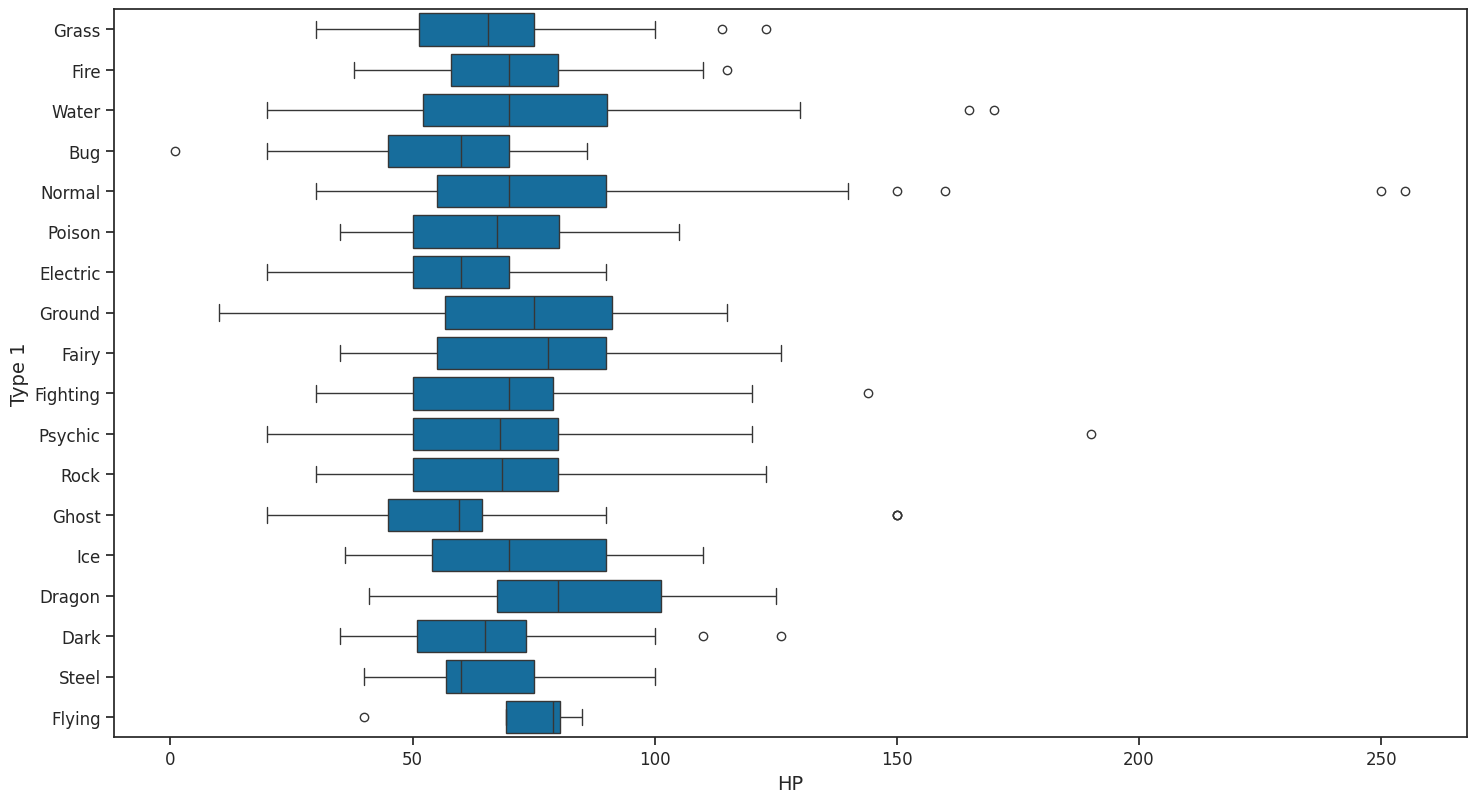

In [98]:
fig = plt.figure()
ax = sns.boxplot(y="Type 1", x="HP", data=pokemon)
plt.tight_layout()

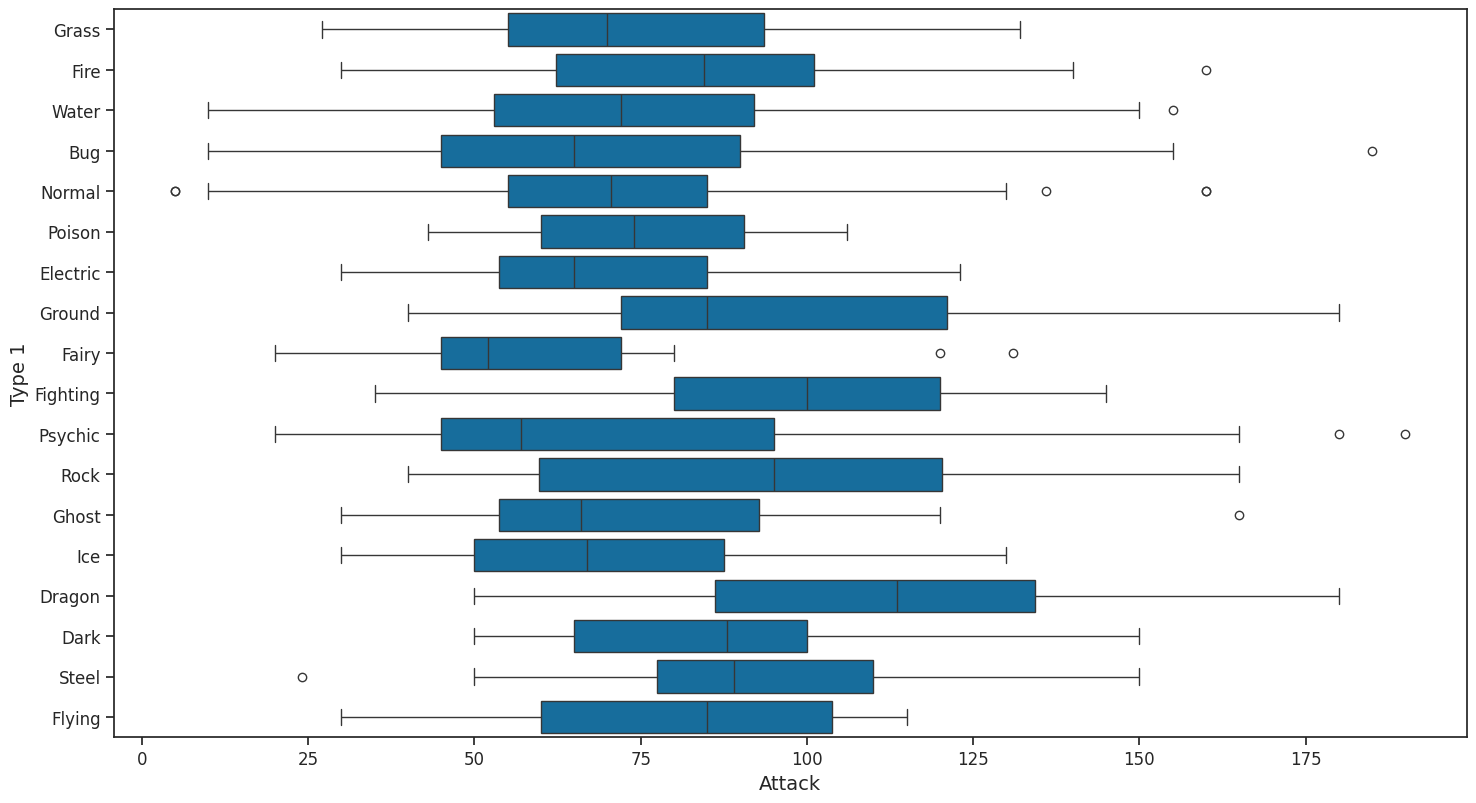

In [99]:
fig = plt.figure()
ax = sns.boxplot(y="Type 1", x="Attack", data=pokemon)
plt.tight_layout()

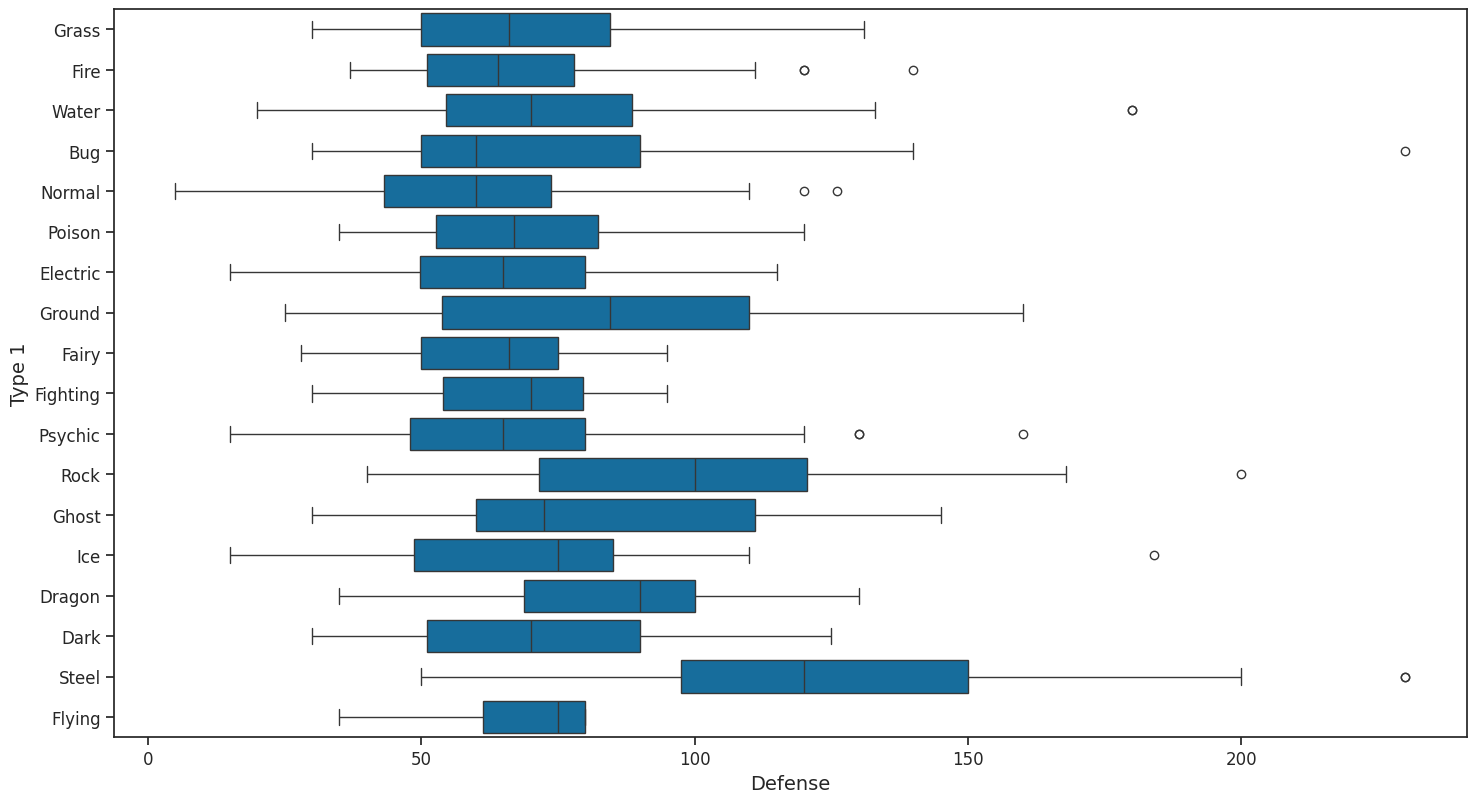

In [100]:
fig = plt.figure()
ax = sns.boxplot(y="Type 1", x="Defense", data=pokemon)
plt.tight_layout()

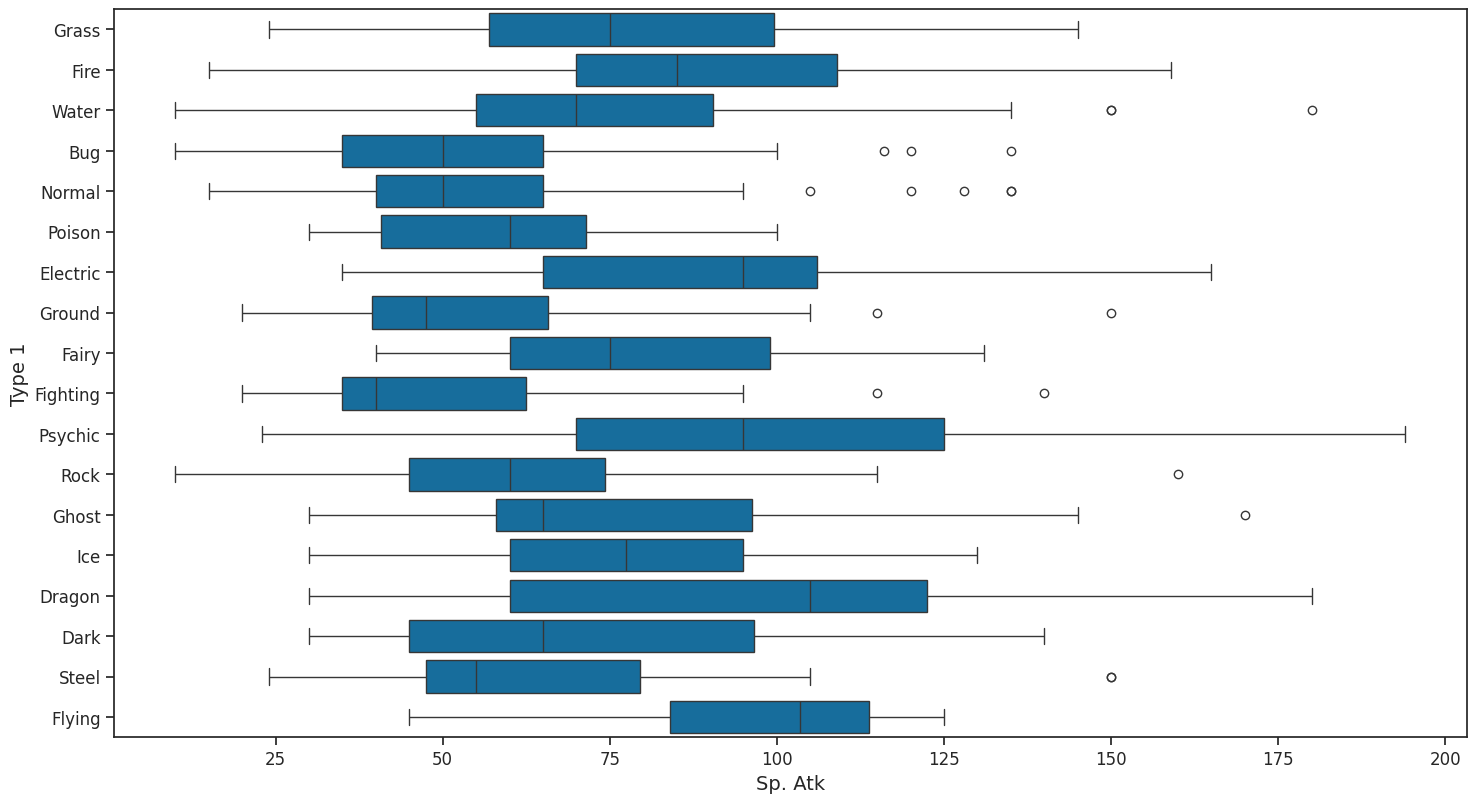

In [101]:
fig = plt.figure()
ax = sns.boxplot(y="Type 1", x="Sp. Atk", data=pokemon)
plt.tight_layout()

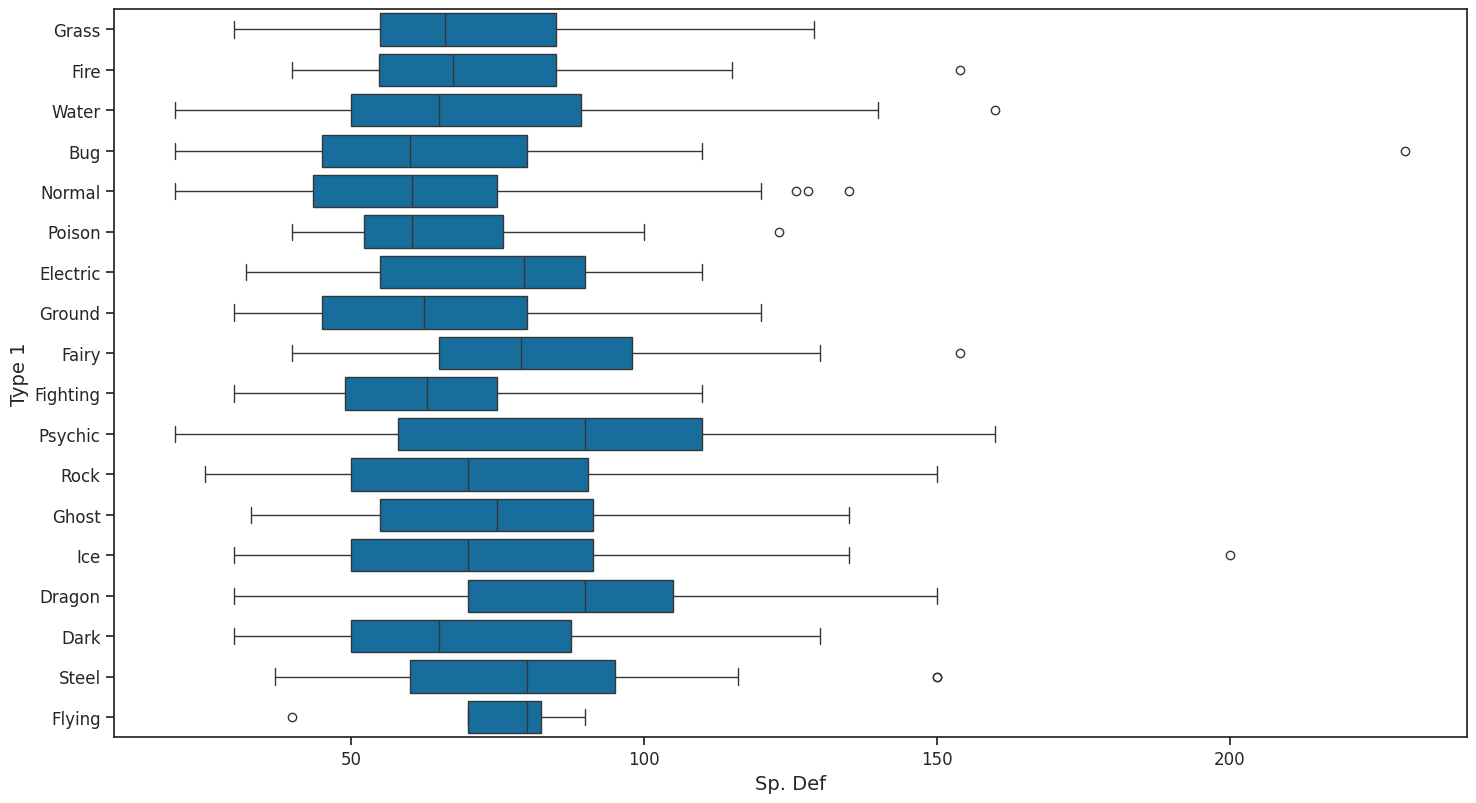

In [103]:
fig = plt.figure()
ax = sns.boxplot(y="Type 1", x="Sp. Def", data=pokemon)
plt.tight_layout()

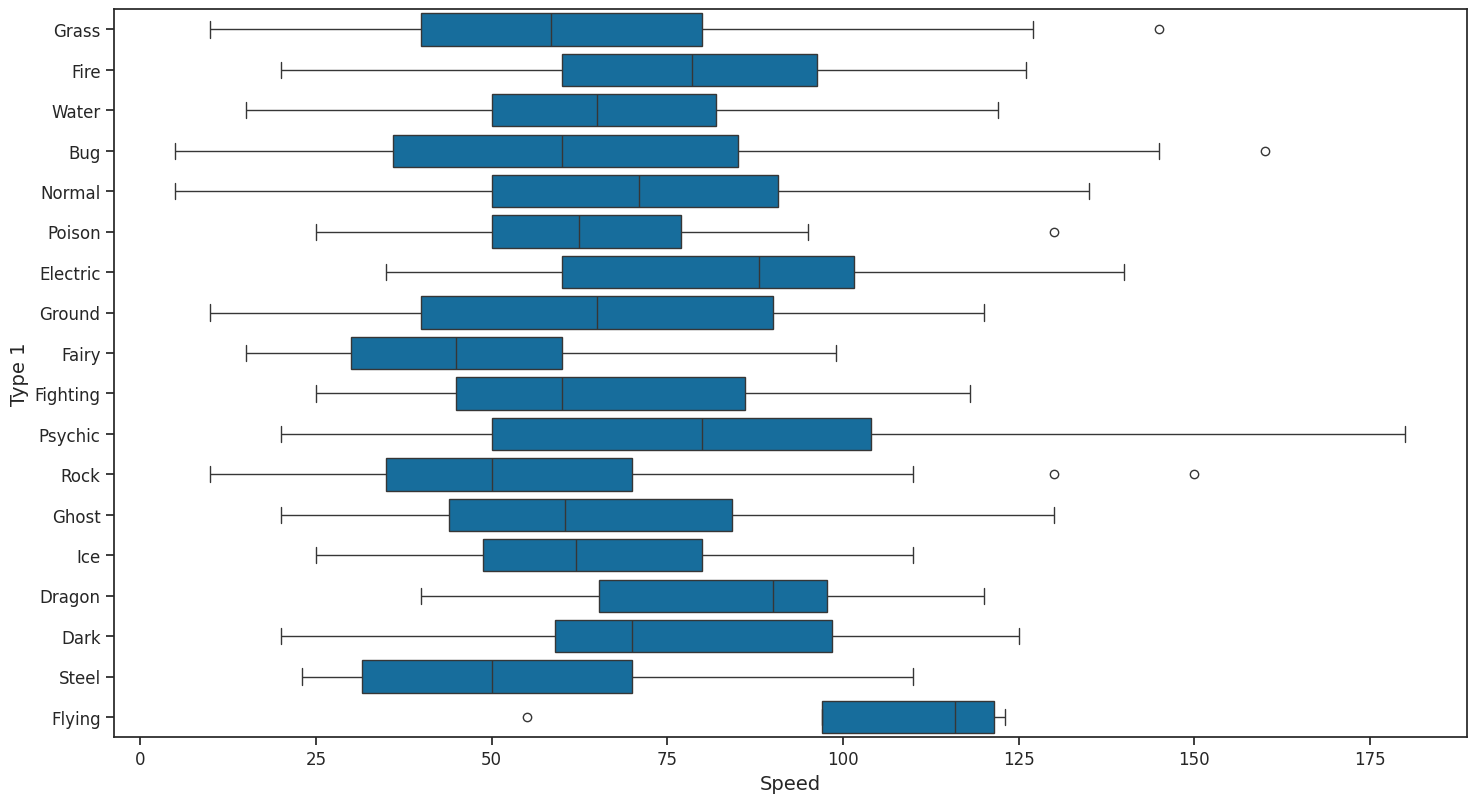

In [104]:
fig = plt.figure()
ax = sns.boxplot(y="Type 1", x="Speed", data=pokemon)
plt.tight_layout()

Para terminar, vamos a comparar la cantidad de Pokémon de cada generación:

Text(0.5, 1.0, 'Number of Pokemon for generations and Type of Pokemon')

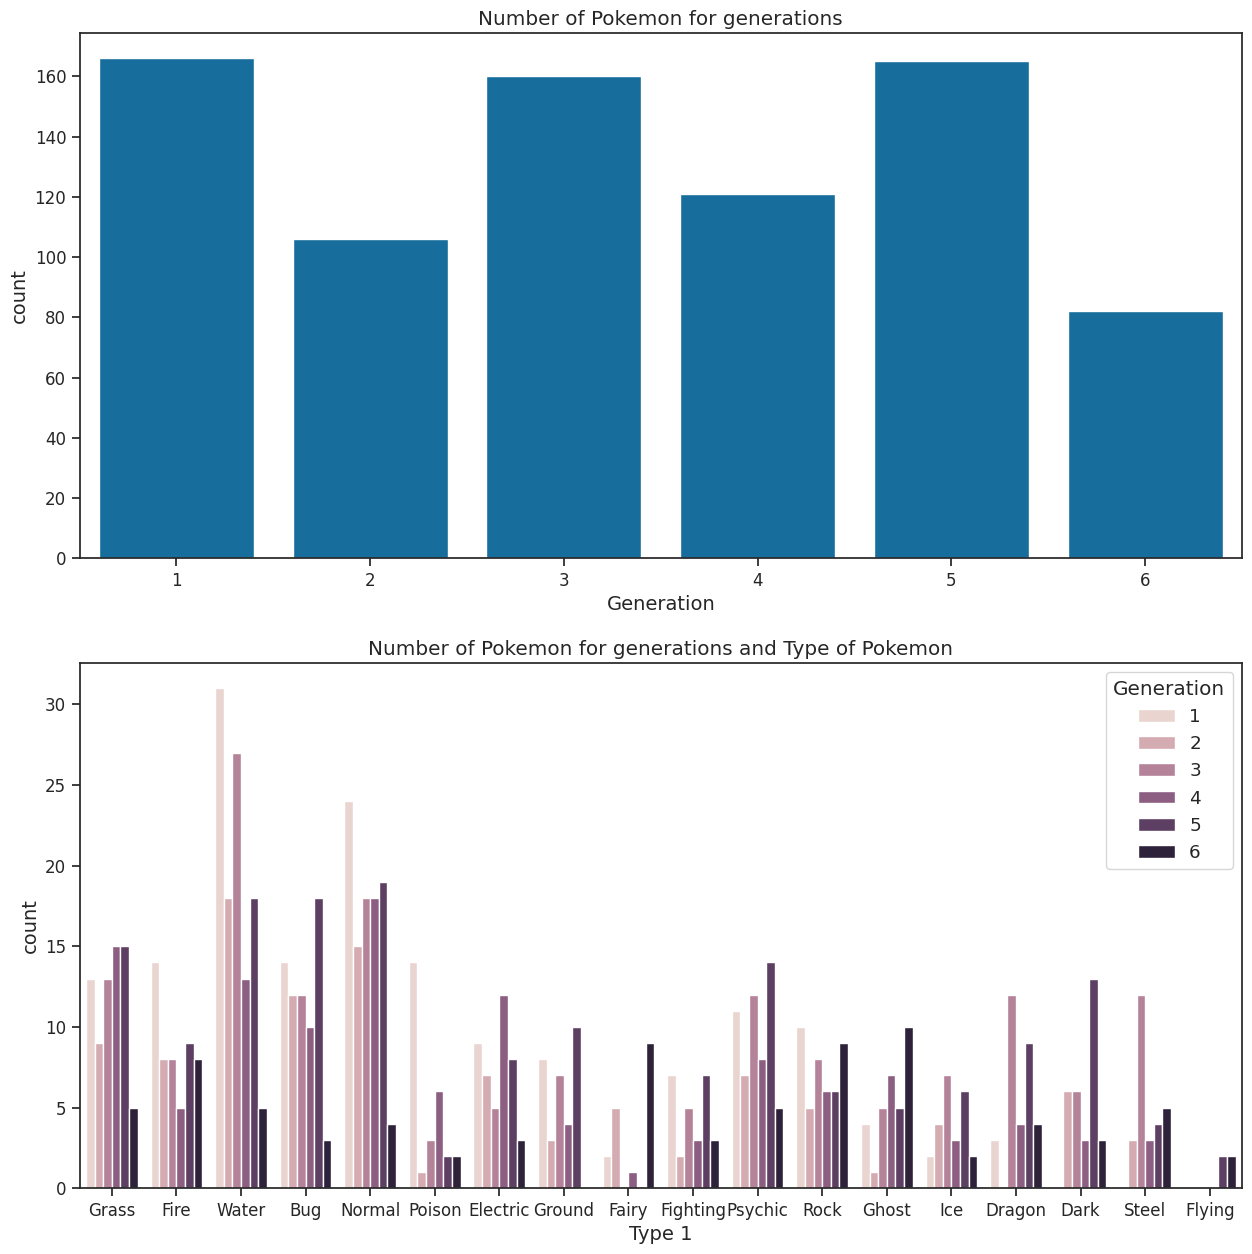

In [107]:
fig,ax = plt.subplots(2,figsize=(15,15))
sns.countplot(x="Type 1",hue='Generation', data=pokemon,ax=ax[1])
sns.countplot(x="Generation", data=pokemon,ax=ax[0])
ax[0].set_title('Number of Pokemon for generations')
ax[1].set_title('Number of Pokemon for generations and Type of Pokemon')

Como podemos ver, las generaciones que más pokémon tienen son la 1ª y la 5ª, mientras que la que menos es la sexta.